# Classification (Sınıflandırma) Problemleri

`1- İkili Sınıflandırma (Binary Classification):` Veri iki gruptan birine dahildir (Evet/Hayır, 1/0, Var/Yok). Örneğin bir e-postanın Spam mi yoksa Gelen Kutusu (Not Spam) mesajı mı olduğunu anlamak. Bir tıbbi test sonucunun pozitif veya negatif olması.

`2. Çok Sınıflı Sınıflandırma (Multi-class Classification):` Burada ikiden fazla seçenek vardır, ancak her veri yalnızca tek bir kategoriye ait olabilir. Yani amaç birçok seçenek arasından "en uygun olan tek bir tanesini" seçmek. Örneğin bir yemek fotoğrafına bakıp bunun Sushi mi, Biftek mi yoksa Pizza mı olduğuna karar vermek. Fotoğraf aynı anda hem pizza hem sushi olamaz; sistem en yüksek olasılıklı olanı seçer. Ya da El yazısıyla yazılmış rakamları (0'dan 9'a kadar) tanıma sistemi.

`3. Çok Etiketli Sınıflandırma (Multi-label Classification):` Bu en esnek olanıdır. Bir veri aynı anda birden fazla kategoriye veya etikete sahip olabilir. "Bu veri hangi etiketlerin hepsini taşıyor?" sorusuna yanıt arar. Örnek olarak bir Wikipedia makalesini kategorize etmek. Bir makale aynı anda hem Yapay Zeka, hem Makine Öğrenmesi, hem de Bilim etiketlerini alabilir. Ya da Bir Netflix filmine "Aksiyon", "Macera" ve "Bilim Kurgu" etiketlerinin aynı anda verilmesi.


Şimdi aşağıda bir regresyon modelini eğitirken kullanılan yöntemleri tekrar edlim ve ardından classifaction modelinde ne gibi değişiklikler oluyor buna bakalım.



> Temel PyTorch İş Akışı

- Veriyi Hazırla: Verileri bilgisayarın anlayacağı "tensor" formatına dönüştürmek.

- Model Seç/İnşa Et: Probleminize uygun bir sinir ağı mimarisi kurmak.

    -  Alt Adımlar: Bir kayıp fonksiyonu (loss function) ve optimize edici (optimizer) seçmek ve bir eğitim döngüsü oluşturmak.

- Eğitim (Fitting): Modeli verilerle besleyip örüntüleri öğrenmesini sağlamak.

- Değerlendirme: Modelin performansını test verileri üzerinde ölçmek.

- İyileştirme: Deneyler yaparak (hiperparametreleri değiştirerek) sonucu geliştirmek.

- Kaydet ve Yükle: Eğitilen modeli daha sonra kullanmak üzere saklamak.


Şimdi de PyTorch kullanarak bir Sınıflandırma (Classification) modelinin nasıl geliştirileceğine bakalım.

- Temel Yapı ve Veri Hazırlığı
   - 0. Sınıflandırma Sinir Ağı Mimarisi: Sinir ağlarının farklı şekil ve boyutlarda olabileceği, ancak sınıflandırma için genellikle belirli bir "kat planı" (mimari yapı) izlediği anlatılır.
   - 1. İkili Sınıflandırma Verisi Hazırlama: Başlangıç için sadece iki seçeneğin (Evet/Hayır gibi) olduğu basit bir veri seti oluşturulur.
- Model İnşası ve Eğitim
   - 2. PyTorch Sınıflandırma Modeli Kurma: Verideki kalıpları öğrenecek model inşa edilir; burada sınıflandırmaya özel kayıp fonksiyonu (loss function) ve optimize edici (optimizer) seçilir.
   - 3. Modeli Veriye Eğitme (Training): Modelin eğitim verileri içindeki gizli örüntüleri (patterns) bulması sağlanır.
- Değerlendirme ve İyileştirme
   - 4. Tahmin Yapma ve Değerlendirme (Inference): Modelin öğrendiği kalıplar, daha önce görmediği test verileriyle karşılaştırılarak başarısı ölçülür.
   - 5. Modeli Geliştirme: Eğer model yeterince iyi sonuç vermiyorsa, mimariyi veya parametreleri değiştirerek performansın nasıl artırılacağı üzerinde durulur.
- Karmaşık Kavramlar ve Çok Sınıflı Yapı
   - 6. Doğrusalsızlık (Non-linearity): Şimdiye kadar modeller sadece "düz çizgiler" çizebiliyordu. Bu adımda, karmaşık verileri ayırmak için gerekli olan "eğri" veya "karmaşık" çizgilerin nasıl ekleneceği anlatılır.
   - 7. Doğrusal Olmayan Fonksiyonları Uygulama: ReLU veya Sigmoid gibi fonksiyonların matematiksel ve kodsal karşılıkları incelenir.
   - 8. Çok Sınıflı Sınıflandırma (Multi-class): Öğrenilen her şey birleştirilerek, ikiden fazla kategorinin (örneğin: kedi, köpek, kuş) olduğu daha zor problemlere uygulanır.


---
`Input Layer :`Elindeki veride, bir örneği tanımlayan kaç tane özellik (feature) var? Bu sayı kesinlikle veri setindeki sütun sayısıyla (özellik sayısıyla) aynı olmalıdır.

`hidden_layers :` Burası modelin "beyninin" derinliğidir. Giriş ile çıkış arasında kaç tane katman olacağıdır. En az 1 tane olmalıdır (yoksa derin öğrenme olmaz). Üst sınır teorik olarak "sınırsızdır" (unlimited), ancak bilgisayarının gücüyle sınırlıdır. Ne kadar çok katman eklersen, model o kadar karmaşık ilişkileri öğrenebilir (Deep Learning buradan gelir).

`neurons_per_hidden_layer :` Burası modelin "genişliğidir". Her bir gizli katmanda kaç tane işlem birimi (nöron) olacağıdır. Genelde 10 ile 512 arasında seçilir.
-  Çok az nöron: Model öğrenemez (Underfitting).
-  Çok fazla nöron: Model ezberler (Overfitting) ve işlem süresi uzar.


`output_layer_shape / out_features:` Modelin sonucunu veren kısımdır. İkili sınıflandırma ise burası 1 olmalıdır. Eğer Multiclass sınıflandırma ise de burası sınıf sayısı kadar olmalıdır.

`hidden_layer_activation:` Modelin "düz çizgi olmayan" (non-linear) karmaşık şekilleri öğrenmesini sağlayan matematiksel fonksiyondur. Genellikle ReLU (Rectified Linear Unit) kullanılır. Negatif sayıları sıfıra eşitler, pozitifleri aynen geçirir. Bu basit işlem, modelin inanılmaz karmaşık öğrenmeler yapmasını sağlar.

`output_activation: ` Modelden çıkan ham sayıları (logits) "olasılığa" çevirir. İkili Sınıflandırma (Binary): Sigmoid (torch.sigmoid) kullanılır. Ne Yapar? Herhangi bir sayıyı 0 ile 1 arasına sıkıştırır. (Örn: 0.9 = %90 Evet). Çok Sınıflı Sınıflandırma (Multiclass): Softmax (torch.softmax) kullanılır. Ne Yapar? Çıkan tüm skorları topladığında tam 1 (yani %100) olacak şekilde birbirine oranlar. (Örn: Kedi %70 + Köpek %20 + Kuş %10 = %100).

`loss_function:` Modelin hatasını (cezasını) hesaplayan formüldür. İkili Sınıflandırma (Binary): Binary Cross Entropy (torch.nn.BCELoss). Sadece 0 ve 1 arasındaki hatayı ölçmek için özelleşmiştir. Çok Sınıflı Sınıflandırma (Multiclass): Cross Entropy (torch.nn.CrossEntropyLoss). Çoklu sınıflar arasındaki dağılım hatasını ölçer.

`optimizer: ` Modelin hatasını (Loss) azaltmak için ağırlıkları (weights) güncelleyen "tamirci"dir. Seçenekler: SGD (Stochastic Gradient Descent) veya Adam. Adam günümüzde genellikle varsayılan (default) başlangıç noktasıdır çünkü daha hızlı öğrenir. SGD daha klasik ve bazen daha kararlıdır.

# Data Oluşturmak
Gerçek hayatta veriler genellikle dışarıdan (Excel dosyaları, veritabanları vb.) gelir; ancak öğrenme aşamasında konuyu anlamak için bilgisayara "yapay" veri ürettirilir. Burada yapılan işlem tam olarak budur.
- Burada Python'un en popüler makine öğrenmesi kütüphanelerinden biri olan Scikit-Learn (sklearn) kullanılıyor.


In [1]:
from sklearn.datasets import make_circles

# 1000 adet örnek oluşturmak için
n_samples = 1000

X, y = make_circles(
    n_samples= n_samples,
    noise = 0.03,  # Dağınık ve gerçekçi olsun diye
    random_state=42,
)


- make_circles: Bu fonksiyon, iç içe geçmiş iki çember şeklinde noktalar üretir. Bu önemlidir çünkü düz bir çizgiyle (lineer) ayrılamayan, doğrusal olmayan (non-linear) bir veri setidir. Sinir ağının yeteneklerini test etmek için mükemmeldir.
- n_samples = 1000: Toplamda 1000 adet veri noktası (örnek) oluşturuluyor.
- noise=0.03: Veriler kusursuz çemberler olmasın, biraz dağınık ve gerçekçi olsun diye %3 oranında rastgele "gürültü" (hata payı) ekleniyor.

In [2]:
print(f"Features : {X[:5]}\n\n")
print(f"Label : {y[:5]}")

Features : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


Label : [1 1 1 1 0]


Şimdi ise "visualize, visualize, visualize" mottosu gereği görselleştirme yapacağız.

In [3]:
import pandas as pd

circles = pd.DataFrame(
    {
        "X1" : X[:, 0],
        "X2" : X[:, 1],
        "label" : y
    }
)

In [4]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


X1 sütunu: X[:, 0] komutuyla, tüm noktaların birinci koordinatını (yatay eksen) alıyor.

X2 sütunu: X[:, 1] komutuyla, tüm noktaların ikinci koordinatını (dikey eksen) alıyor.

label sütunu: y verisini alarak, o noktanın hangi sınıfa (0 veya 1) ait olduğunu yazıyor.

In [5]:
circles.label.value_counts()

,count
label,
1,500
0,500


Dengeli bir dağılım vardır.

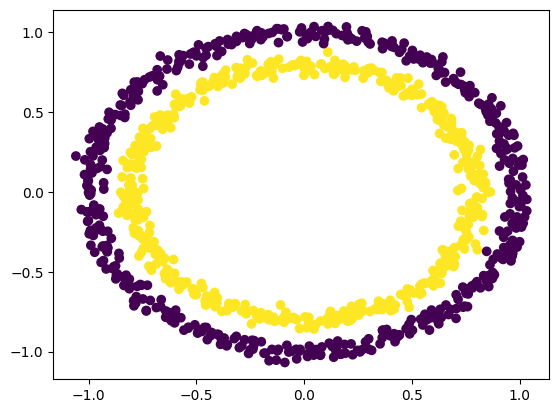

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0], y = X[:, 1], c = y)

Bu iki grubu birbirinden ayırmak için eline bir cetvel alıp düz bir çizgi çizebilir misin? Hayır.
Nereye düz çizgi çizersen çiz, mutlaka hatalı bir ayrım yaparsın. Bu iki grubu ayırmak için yuvarlak (kıvrımlı) bir sınır çizmen gerekir.

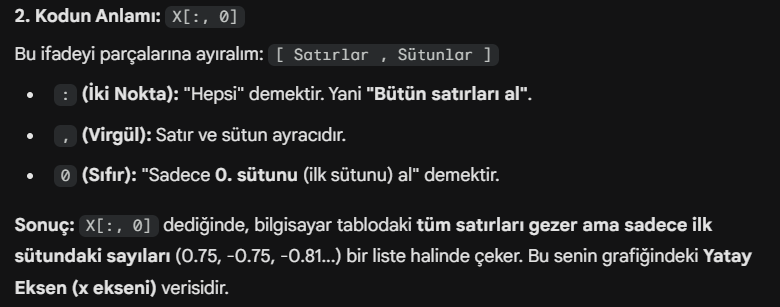

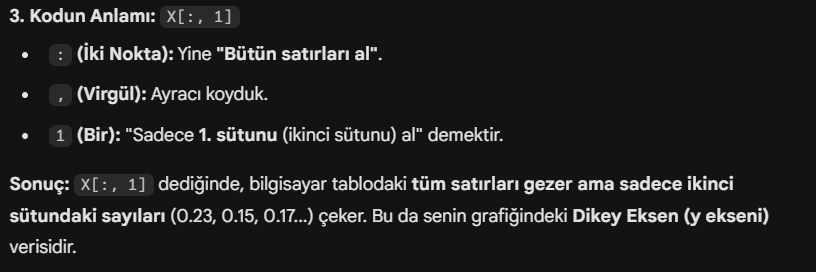

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

Boyutları 1000'e 2 olarak ayarlanmış. Şimdi de içindeki parçaların nasıl gözüktüğüne örneklem olarak bakalım.

In [8]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


- X değeri içerisinde 2 tane eleman olan bir vektör olarak karşımıza çıkıyor.

- y değeri ise shape olarak boş gözüküyor. Bu da bunun boyutu olmadığını, sadece tek bir sayı (Skaler) olduğunu gösterir.

Buradan çıkarım yapmamız gerekirse Modelin Giriş Kapısı (Input Layer), aynı anda 2 sayıyı kabul edecek şekilde tasarlanmalı. (Çünkü X'in 2 özelliği var).

Modelin Çıkış Kapısı (Output Layer), dışarıya 1 sayı verecek şekilde tasarlanmalı. (Çünkü y tek bir sayı).

Bilgisayarımızda şu an veriler NumPy formatında duruyor. Ancak PyTorch modelleri NumPy dizileriyle çalışmaz; PyTorch Tensor'ları ile çalışır (çünkü Tensorlar ekran kartında çalışabilir ve türev alabilir). Bu yüzden bu verileri tensorlara çevireceğiz.

In [9]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

NumPy genellikle sayıları "float64" (çok hassas) olarak tutar. Ancak PyTorch sinir ağları varsayılan olarak "float32" (daha hızlı ve yeterli) kullanır. Bu dönüşümü yapmazsan ileride "Veri tipi uyuşmazlığı" hatası alırsın.

In [10]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

Çıktıda artık array([...]) yerine tensor([...]) görüyoruz. Artık veriler PyTorch dünyasına giriş yaptı.

Şimdi artık verileri train ve test verileri olarak ayırabiliriz.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

Özetle; malzemeleri doğradık (boyutları ayarladık), tencereye uygun hale getirdik (Tensor yaptık) ve şimdi yemeği yapacak kısım ile tadına bakacak kısmı ayırdık (Split yaptık). Artık model inşasına hazırız.

# Model Oluşturma

1- Cihazdan Bağımsız Kod Ayarlamak: Kodun hem CPU (İşlemci) hem de GPU (Ekran Kartı) üzerinde çalışabilmesini sağlamak. (Şu an yapılan adım bu).

2- Modeli Oluşturmak: nn.Module sınıfını kullanarak sinir ağını tasarlamak.

3- Kayıp Fonksiyonu ve Optimize Edici Seçmek: Daha önce konuştuğumuz "Loss Function" ve "Optimizer"ı tanımlamak.

4- Eğitim Döngüsü (Training Loop): Modeli eğitecek döngüyü yazmak.

In [13]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Şimdi modelimizin olduğu class yapısını oluşturabiliriz

In [14]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(
        in_features=2,
        out_features=5
    )


    self.layer_2 = nn.Linear(
        in_features=5,
        out_features=1
    )

  def forward(self, x: torch.Tensor):
    return self.layer_2(self.layer_1(x))

`super().__init__(): `Miras aldığımız ata sınıfın (nn.Module) özelliklerini başlatır. Bunu yazmazsak PyTorch özellikleri çalışmaz.

`Katman 1 (self.layer_1):`
- Giriş (2): Neden 2? Çünkü verimiz X1 ve X2 koordinatlarından oluşuyor. (Önceki görsellerdeki "input shape").

* Çıkış (5): Neden 5? Bu tamamen bizim seçimimiz (buna birazdan değineceğiz). Modelin veriyi 5 farklı açıdan incelemesini istiyoruz. Buna "Gizli Katman" (Hidden Layer) denir.

`Katman 2 (self.layer_2):`
* Giriş (5): Burası çok kritik! Bir önceki katman dışarı 5 sayı çıkardıysa, bu katman içeri 5 sayı almak zorundadır. (Boru tesisatı gibi düşün, boru çapları uymalı).

* Çıkış (1): Neden 1? Çünkü problemimiz İkili Sınıflandırma. Sonuçta tek bir karar istiyoruz: "Bu nokta 1. gruba mı ait?" (Evet/Hayır).

`İleri Besleme (def forward(self, x):)`
Anlamı:

1. Veriyi (x) al.

2. layer_1'den geçir (2 sayı girdi, 5 sayı çıktı).

3. Çıkan sonucu layer_2'den geçir (5 sayı girdi, 1 sayı çıktı).

4. Sonucu döndür.

In [15]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Düşün ki bir dedektifsin. Sana sadece "Boy" ve "Kilo" (2 veri) veriliyor.

Sen kafanda bunları işleyerek 5 yeni özellik türetiyorsun: "Vücut Kitle Endeksi", "Obezite Riski", "Hareket Kabiliyeti" vb.

İşte out_features=5 diyerek modele "Bu 2 veriyi al, kendi içinde yorumla ve bana 5 farklı bakış açısı üret" diyoruz. Bu, modelin öğrenme kapasitesini artırır.

Buna Gizli Birimler (Hidden Units) veya Nöronlar denir.

Buradaki "5" sayısı bir hiperparametredir. İstersek 10 yaparız, istersek 512.

Genelde 10 ile 512 arasında seçilir. Çok az olursa öğrenemez, çok fazla olursa gereksiz yavaşlar.

"Bir katmanın out_features (çıkış) sayısı, bir sonraki katmanın in_features (giriş) sayısına EŞİT OLMALIDIR."

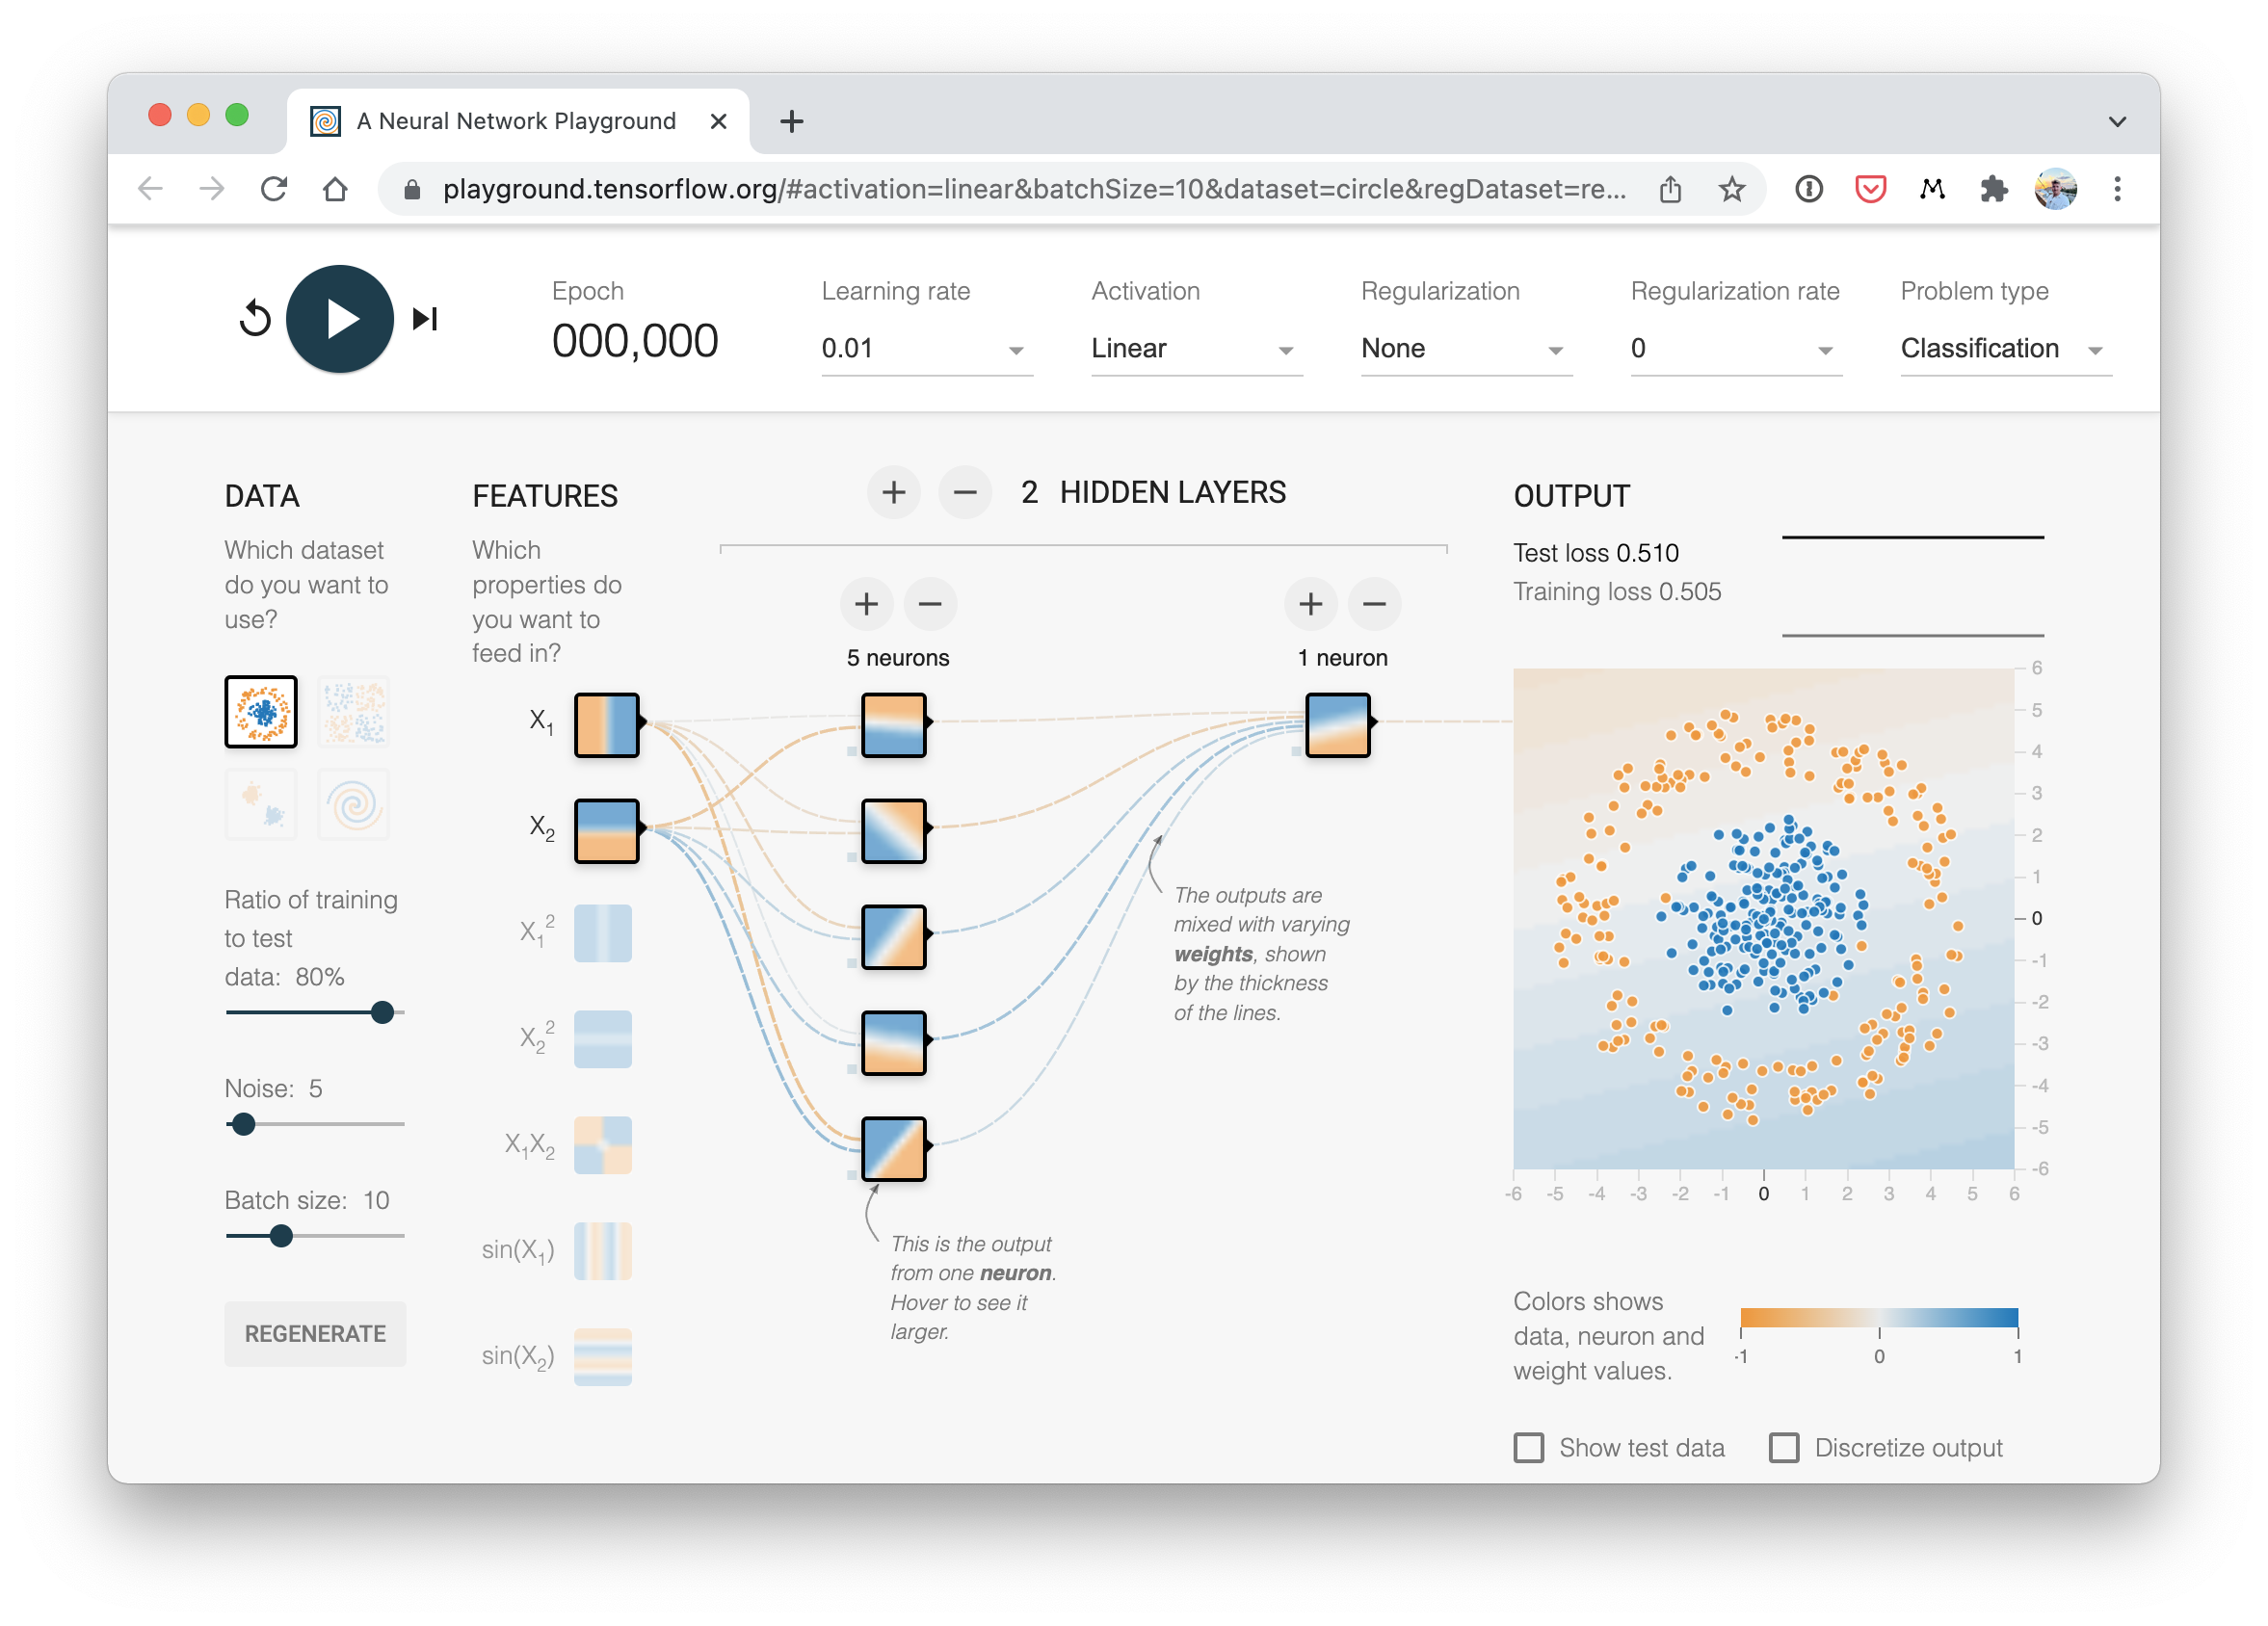

Buradaki self.layer_1 gibi isimleri kendimiz verdik ve bunların sayısını da yine kendimiz ayarladık. Bunlar istediğimiz sayıda ve isimde olabilirler.
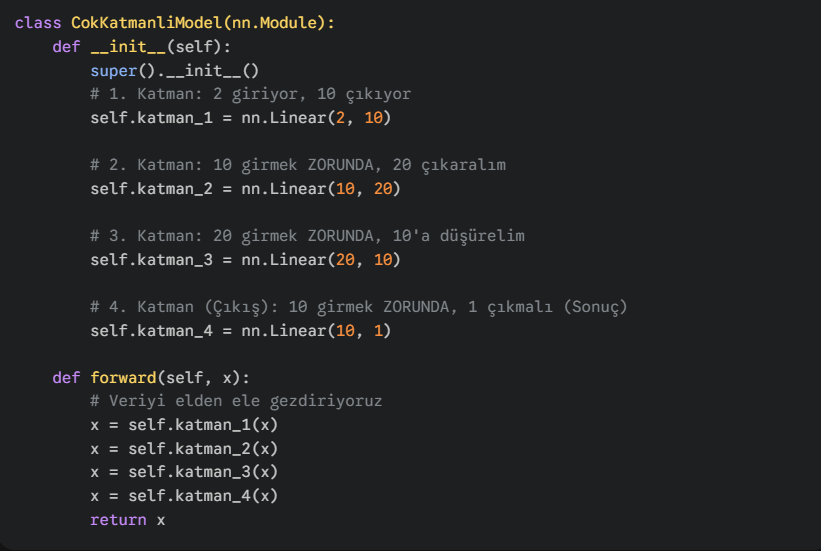

Karmaşık class yapıları ile oluşturduğumuz modelleri **nn.Sequential** yapısı ile daha hızlı ve kolayca oluşturabiliriz.

- Bir önceki kodda CircleModelV0 sınıfını yazarken __init__ ve forward fonksiyonlarını tek tek tanımlamıştık. Burada ise PyTorch bize diyor ki: "Eğer yapacağın iş dümdüz, sırasıyla işleyen bir sistemse, bu kadar kod yazmana gerek yok."

- nn.Sequential Nedir? Bu, içine koyduğun katmanları sırasıyla (sequential) çalıştıran hazır bir "konteyner" veya "paket"tir. Veri üstten girer, birinci satıra uğrar, oradan çıkar ikinciye uğrar ve en alttan çıkar. Otomatik olarak forward fonksiyonunu kendi içinde halleder. Senin yazmana gerek kalmaz.

- Madem bu kadar basit, neden hep bunu kullanmıyoruz? nn.Sequential sadece A -> B -> C şeklinde dümdüz giden modeller için harikadır. Ancak ileride (örneğin ResNet gibi) karmaşık modellerde, verinin bir kısmı B'ye giderken bir kısmı C'ye atlayabilir (skip connection) veya tek girdiden çift çıktı alabilirsin. Böyle karmaşık "trafik akışlarını" yönetmek için class yapısını (önceki yöntemi) kullanmak zorundasın.

In [16]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.8442],
        [0.8132],
        [0.7416],
        [0.8740],
        [0.4497],
        [0.4331],
        [0.5771],
        [0.4874],
        [0.7540],
        [0.8079]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Burada da sadece oluşturduğumuz ama eğitmediğimiz modele test verilerini verdik ve tahminlerini aldık.

`1. Kayıp Fonksiyonu Seçimi (Loss Function):` Regresyon (Sayı Tahmini): Daha önceki derslerde (örneğin ev fiyatı tahmini) MAE (Ortalama Mutlak Hata) veya MSE kullanmıştın. Çünkü orada "Hedef 100 ise ve ben 90 tahmin ettiysem, 10 birim uzağım" diyebiliyordun. Sınıflandırma (Kategori Tahmini): Bizim şu anki problemimiz (Kırmızı mı Mavi mi?). Burada mesafe ölçmek çok mantıklı değil. Bunun yerine "Olasılık Hatası" ölçülür.

Kural: İkili sınıflandırma (Binary Classification) yapıyorsan, kullanacağın standart fonksiyon Binary Cross Entropy (BCE)'dir.

Özet: Regresyon için cetvel (MAE/MSE) kullanılırken, sınıflandırma için doğruluk puanı (Cross Entropy) kullanılır.

`2. Optimize Edici Seçimi (Optimizer):` Güzel Haber: Kayıp fonksiyonunun aksine, optimize ediciler genellikle problem seçmez.
- SGD (Stochastic Gradient Descent): Klasik ve güvenilir.
- Adam: Daha modern ve genellikle daha hızlı öğrenen bir algoritma.

Her ikisi de hem regresyon hem de sınıflandırma problemlerinde rahatlıkla kullanılabilir.

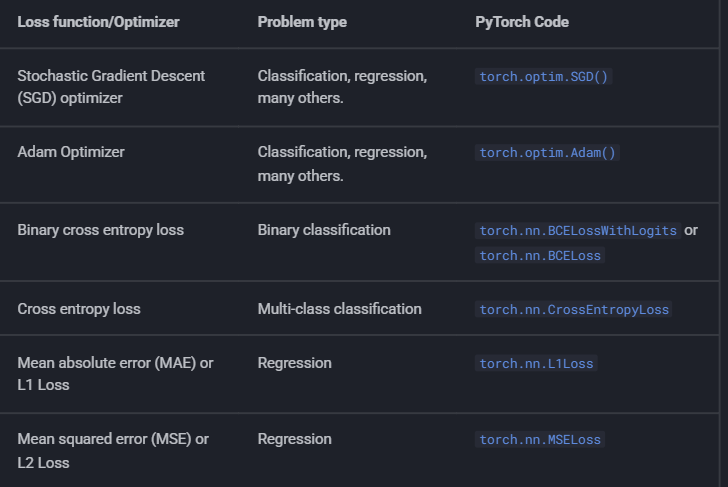

torch.nn.BCELoss():

- Bu fonksiyon, kendisine gelen verinin önceden Sigmoid fonksiyonundan geçirilmiş olmasını (yani 0 ile 1 arasına sıkıştırılmış olmasını) bekler.

- Kısaca: "Sen yemeği pişir, önüme hazır getir, ben sadece yiyeyim" der.

torch.nn.BCEWithLogitsLoss() (Tavsiye Edilen):

- Bu fonksiyon, içinde dahili bir Sigmoid katmanı barındırır.

- Ona ham sayıları (Logits) verirsin, o hem Sigmoid işlemini yapar hem de hatayı hesaplar.

- Kısaca: "Sen malzemeleri çiğ getir (Logits), pişirmeyi de yemeyi de ben hallederim" der.

In [18]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1,
)

Bu bir sınıflandırma işlemi olduğu için karşımıza accuracy kavramı çıkıyor ve bunun ile doğruluk hesaplamış olacağız.

Loss (Kayıp): Modelin ne kadar yanlış olduğunu ölçer. Türev alınabilir, matematikseldir, makinenin öğrenmesi için gereklidir ama insan için anlaşılması zordur (Örn: Loss: 0.693 ne demek?).

Accuracy (Doğruluk): Modelin ne kadar haklı olduğunu ölçer. İnsanların anlaması içindir. (Örn: %95 Başarı).

$$\text{Doğruluk} = \frac{\text{Doğru Tahmin Sayısı}}{\text{Toplam Tahmin Sayısı}} \times 100$$

In [19]:
def accuracy_fn(y_true, y_pred):
  # Doğru olanların sayısını sayalım
  correct = torch.eq(y_true, y_pred).sum().item()

  return (correct / len(y_pred)) * 100

Modelin ürettiği anlamsız ham sayıları, bizim anlayabileceğimiz "Olasılıklara" ve "Etiketlere" nasıl çevireceğiz?

In [20]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.8442],
        [0.8132],
        [0.7416],
        [0.8740],
        [0.4497]], device='cuda:0', grad_fn=<SliceBackward0>)

Modelimizin içinde kurduğumuz nn.Linear() katmanı, aslında arka planda şu meşhur doğrusal cebir denklemini hesaplar:

$$\mathbf{y} = x \cdot \mathbf{Weights}^T + \mathbf{bias}$$

İşte bu denklemden çıkan üzerinde hiçbir oynama yapılmamış, tamamen ham, saf matematiksel sonuçlara derin öğrenmede "Logit" denir. Yani kodun çıktısında gördüğün o rastgele sayılar, modelinin ürettiği ham logitlerdir.

Problem: Bizim veri setimizin cevap anahtarı (gerçek etiketleri) sadece 0 veya 1'den oluşuyor (Kırmızı mı, Mavi mi?). Ancak logitler, eksi sonsuz ile artı sonsuz arasında herhangi bir sayı olabilir (örneğin -45.2 veya 102.8). Bu sayıları 0 veya 1'lerle doğrudan kıyaslayıp doğruluk ölçemeyiz.

Çözüm: Bu anlamsız ham sayıları (logits), bizim etiketlerimizle karşılaştırabileceğimiz anlamlı bir formata dönüştürmemiz gerekiyor. Görselin en altındaki cümlede de belirtildiği gibi, bu ham sayıları bir "Sigmoid Aktivasyon Fonksiyonu" (sigmoid activation function) içinden geçirmeliyiz.



Özetle;

Logits: Modelden çıkan ham, matematiksel sayılar (Şu an buradayız).

Tahmin Olasılıkları (Prediction Probabilities): Logitlerin Sigmoid'den geçip 0 ile 1 arasına (yüzdelik bir ihtimale) sıkıştırılmış hali.

Tahmin Etiketleri (Prediction Labels): Olasılığın (örneğin %70 ise) nihai "1" veya "0" kararına dönüştürülmüş son hali.

In [21]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6993],
        [0.6928],
        [0.6773],
        [0.7056],
        [0.6106]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Sigmoid fonksiyonu, eksi sonsuz ile artı sonsuz arasındaki herhangi bir sayıyı alır ve 0 ile 1 arasına sıkıştırır. Ekranda gördüğün [0.3511], [0.3129] gibi sayılar artık birer yüzdelik ihtimaldir (probability). Örneğin 0.3511, modelin "Bu noktanın %35.11 ihtimalle 1. sınıfa ait olduğunu düşünüyorum" deme şeklidir. (Not: Model henüz eğitilmediği için tüm tahminler %30 civarında çıkıyor, yani model şu an sadece yazı-tura atıyor).

In [22]:
y_preds = torch.round(y_pred_probs)

- Eğer hesaplanan ihtimal 0.5'ten büyük veya eşitse, bu Sınıf 1'dir. Eğer hesaplanan ihtimal 0.5'ten küçükse, bu Sınıf 0'dır.

- torch.round(): Bu fonksiyon bildiğimiz matematiksel yuvarlama işlemini yapar. 0.5139 ihtimalini alır ve 1.0'a yuvarlar. Artık elimizde modelin kesin kararı (Prediction Label) var.

In [23]:
# Bu işlemlerin hepsini tek satırda yapmak için
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

In [24]:
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


Birkaç görsel önce "Şekil Uyuşmazlığı" (Shape Mismatch) uyarısı almıştık. Tahminlerimiz [200, 1] boyutundayken, cevap anahtarımız [200] boyutundaydı. İşte .squeeze() komutu, o fazladan gelen 1 boyutunu (ekstra parantezleri) ezerek yok eder. Çıktıda gördüğün tensor([1., 1., 1., 1., 1.]) yapısı, artık gerçek etiketlerimizle birebir aynı boyuttadır.

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

- İkili Sınıflandırma (Binary): Eğer problemimiz "Kırmızı mı, Mavi mi?" veya "Hasta mı, Değil mi?" gibi sadece iki seçenekliyse, sayıları 0 ile 1 arasına sıkıştırmak için Sigmoid kullanırız.

- Çok Sınıflı Sınıflandırma (Multi-class): Eğer problemimiz 3 veya daha fazla seçeneğe sahipse (Örneğin: Bu resimdeki Kedi mi, Köpek mi, Kuş mu?), Sigmoid yetersiz kalır. Bu durumda ileride öğreneceğimiz Softmax aktivasyon fonksiyonunu kullanmamız gerekecek. Softmax, tüm seçeneklerin ihtimallerinin toplamını %100 yapacak şekilde bir dağılım sağlar.

- Kural: Eğer kayıp fonksiyonu olarak nn.BCEWithLogitsLoss kullanıyorsan, modelden çıkan ham sayıları (logits) bu fonksiyona vermeden önce kendi elinle Sigmoid'den GEÇİRMEMELİSİN.

- Neden?: Çünkü isminden de anlaşıldığı gibi ("WithLogits"), bu fonksiyon ham sayıları kabul etmek üzere tasarlanmıştır. Sen ham sayıları ona verdiğinde, o kendi içinde otomatik olarak Sigmoid işlemini zaten yapar.

- Ne Olur?: Eğer sen önce torch.sigmoid() yapıp, sonra sonucu bu kayıp fonksiyona verirsen, sayıları "iki kere" Sigmoid'den geçirmiş olursun. Bu da matematiği tamamen bozar ve modelinin yanlış öğrenmesine (veya hiç öğrenememesine) sebep olur.

# Train loop

In [26]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.74817, Accuracy: 50.00% | Test loss: 0.74635, Test acc: 50.00%
Epoch: 10 | Loss: 0.71421, Accuracy: 50.00% | Test loss: 0.71565, Test acc: 50.00%
Epoch: 20 | Loss: 0.70209, Accuracy: 50.00% | Test loss: 0.70455, Test acc: 50.00%
Epoch: 30 | Loss: 0.69742, Accuracy: 56.38% | Test loss: 0.70022, Test acc: 54.50%
Epoch: 40 | Loss: 0.69549, Accuracy: 52.62% | Test loss: 0.69838, Test acc: 51.00%
Epoch: 50 | Loss: 0.69461, Accuracy: 52.00% | Test loss: 0.69753, Test acc: 49.00%
Epoch: 60 | Loss: 0.69416, Accuracy: 51.50% | Test loss: 0.69707, Test acc: 49.00%
Epoch: 70 | Loss: 0.69390, Accuracy: 51.12% | Test loss: 0.69678, Test acc: 49.50%
Epoch: 80 | Loss: 0.69372, Accuracy: 50.62% | Test loss: 0.69658, Test acc: 50.00%
Epoch: 90 | Loss: 0.69359, Accuracy: 50.88% | Test loss: 0.69642, Test acc: 48.00%


In [27]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

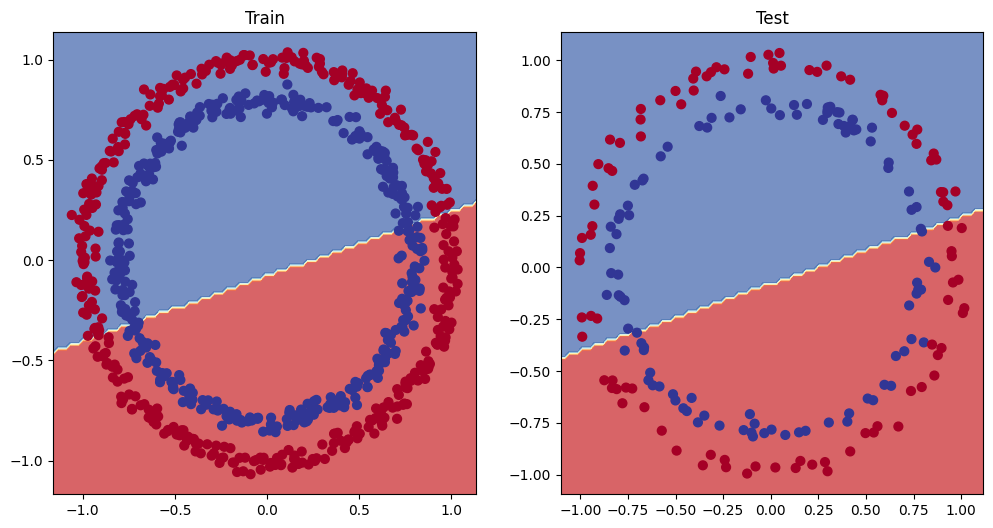

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Modelin başarısı sınırlı kaldı. Bunu geliştirmek için bazı yöntemler bulunuyor:

`1-Daha fazla katman eklemek (Add more layers):` Modele yeni katmanlar eklemek, onun "derinliğini" (deeper) artırır. Her yeni katman, modelin verideki farklı ve yeni bir örüntüyü öğrenme kapasitesini potansiyel olarak artırır.

`2-Daha fazla gizli nöron eklemek (Add more hidden units):` Katmanların içindeki nöron sayısını artırmak, modeli daha "geniş" (wider) yapar. Tıpkı katman eklemek gibi, bu da modelin öğrenme kapasitesini artırma potansiyeline sahiptir.

`3-Daha uzun süre eğitmek (Fitting for longer / more epochs):`Modele veriyi daha fazla tur (epoch) göstererek, ona veriyi incelemesi ve öğrenmesi için daha fazla fırsat tanımaktır.

`4-Aktivasyon fonksiyonlarını değiştirmek (Changing the activation functions):`Görselde yanına (hint, hint) yani "ipucu" düşülen, bizim problemimiz için en kritik maddedir. Verimiz iç içe geçmiş yuvarlaklardan oluşuyor ve düz çizgilerle (linear) ayrılamıyor; bu yüzden modeli "kıvrımlı" (non-linear) düşünmeye zorlayacak aktivasyon fonksiyonları kullanmamız gerektiğini işaret ediyor.

`5-Öğrenme hızını değiştirmek (Change the learning rate):`Modelin hatalarından ders çıkarırken attığı adımların büyüklüğüdür. Adım çok büyükse model doğru noktayı atlayıp aşırı tepki verir (overcorrects), çok küçükse yeterince öğrenemez.

`6-Kayıp fonksiyonunu değiştirmek (Change the loss function):`Problemin türüne uygun doğru "hata ölçüm cetvelini" kullanmaktır (Örn: Çoklu sınıflandırmada Binary Cross Entropy işe yaramaz).

`7-Transfer Öğrenimi (Use transfer learning):`Başka bir problem için önceden çok iyi eğitilmiş bir modeli alıp, kendi problemimize uyarlamaktır.


Tablodaki bu değerlerin hepsini kendi elimizle ayarlayabildiğimiz için bunlara Hiperparametre (Hyperparameter) denir. Makine öğrenmesi yarı bilim, yarı sanattır; projen için hangi ayarların mükemmel kombinasyonu oluşturacağını önceden kesin olarak bilmenin bir yolu yoktur. Bu yüzden veri bilimcilerin ana mottosu şudur: "Deney yap, deney yap, deney yap." (experiment, experiment, experiment).

In [29]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=15)
    self.layer_3 = nn.Linear(in_features=15, out_features=1)

  def forward(self, x:torch.Tensor):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
)

In [30]:
loss_fn = nn.BCEWithLogitsLoss()   # WithLogits ile yaptığımız için sigmoid fonksiyonu gerekmiyor
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr = 0.1
)

Modele burada 1 adet daha katman ekledik ve içerdikleri nöron sayılarını da arttırdık. Loss fonksiyonu ve optimizer için ise üstteki model ile aynı ayarları kullandık.

In [31]:
torch.manual_seed(42)
epochs = 1000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model_1.train()

  #1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calculate Loss/Accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()


  # Test
  model_1.eval()
  with torch.inference_mode():
    #1. Forward Pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2. Calculate Loss/Accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
    print(f"Epoch is : {epoch} | Loss : {loss} | Accuracy : {acc} | Test Loss : {test_loss} | Test Accuracy : {test_acc}")


Epoch is : 0 | Loss : 0.7007321715354919 | Accuracy : 50.625 | Test Loss : 0.6982375383377075 | Test Accuracy : 55.50000000000001
Epoch is : 100 | Loss : 0.6931875348091125 | Accuracy : 49.375 | Test Loss : 0.6936136484146118 | Test Accuracy : 50.0
Epoch is : 200 | Loss : 0.6930016875267029 | Accuracy : 50.625 | Test Loss : 0.6941521167755127 | Test Accuracy : 47.5
Epoch is : 300 | Loss : 0.6929832100868225 | Accuracy : 51.5 | Test Loss : 0.694447934627533 | Test Accuracy : 46.0
Epoch is : 400 | Loss : 0.6929804682731628 | Accuracy : 51.5 | Test Loss : 0.6945803165435791 | Test Accuracy : 45.0
Epoch is : 500 | Loss : 0.6929799318313599 | Accuracy : 51.125 | Test Loss : 0.6946374177932739 | Test Accuracy : 45.5
Epoch is : 600 | Loss : 0.6929798722267151 | Accuracy : 51.0 | Test Loss : 0.6946616768836975 | Test Accuracy : 46.0
Epoch is : 700 | Loss : 0.6929798722267151 | Accuracy : 51.0 | Test Loss : 0.6946720480918884 | Test Accuracy : 46.0
Epoch is : 800 | Loss : 0.6929798722267151 | A

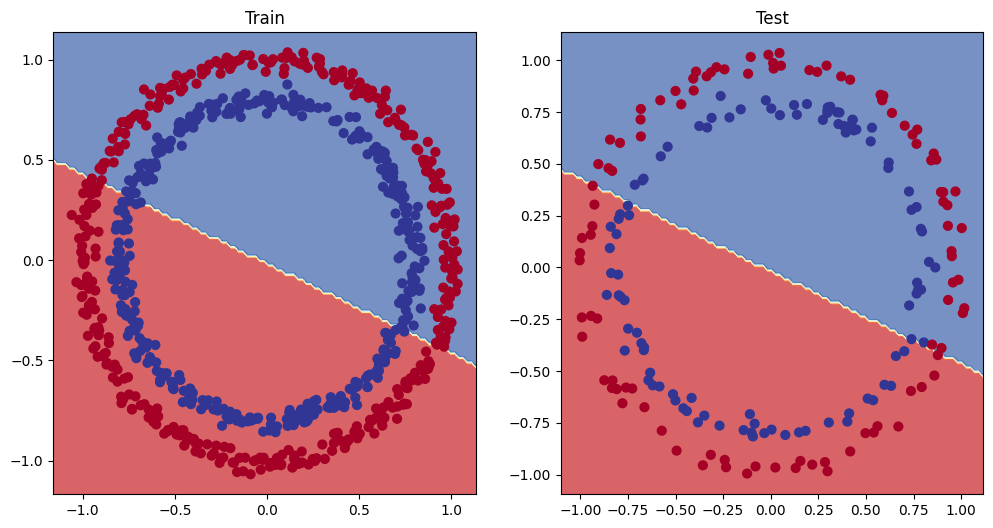

In [32]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Grafiğe baktığımızda modelin tam anlamıyla çuvalladığını görüyoruz. Kırmızı noktaların yarısı mavi bölgede, mavi noktaların yarısı kırmızı bölgede kalmış. Modelin başarı oranı hala %50 civarında (yani yazı-tura atıyor).

Peki ama neden? Biz bu modeli büyütmedik mi, derinleştirmedik mi, 1000 tur eğitmedik mi?

Evet eğittik, ancak mimariyi kurarken sadece nn.Linear (Doğrusal) katmanlar kullandık. Matematiksel bir kural vardır: İstediğiniz kadar doğrusal (linear) denklemi birbiriyle çarpın veya toplayın, sonuç her zaman yine doğrusal (düz bir çizgi) olacaktır.

Yani sen modele "Katman 1, Katman 2, Katman 3" diyerek çok büyük bir beyin verdin ama ona sadece cetvel verdin. Model, iç içe geçmiş yuvarlakları ayırmak için çaresizce o cetvelle en iyi düz çizgiyi çekmeye çalıştı.

---
Kendimize şu soruyu sorarak başlıyoruz.

 Bir önceki adımda modelimiz, o iç içe geçmiş yuvarlakları (kırmızı ve mavi noktaları) ayırmakta tamamen çuvallamış ve ekrana kocaman düz bir çizgi çizmişti. Şimdi yazar, çok mantıklı bir dedektiflik sorusu soruyor: "Acaba bizim modelimiz hiçbir şey öğrenemeyen tamamen bozuk bir model mi, yoksa sadece yuvarlak (kavisli) verileri mi öğrenemiyor?".


In [33]:
weight = 0.7
bias = 0.3

# Data Oluşturma
X_regression = torch.arange(
    start=0,
    end=1,
    step=0.01
).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))

100


In [34]:
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

Şimdi verimizi train ve test datası olarak ayıralım.

In [35]:
train_split = int(0.8 * len(X_regression))

X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

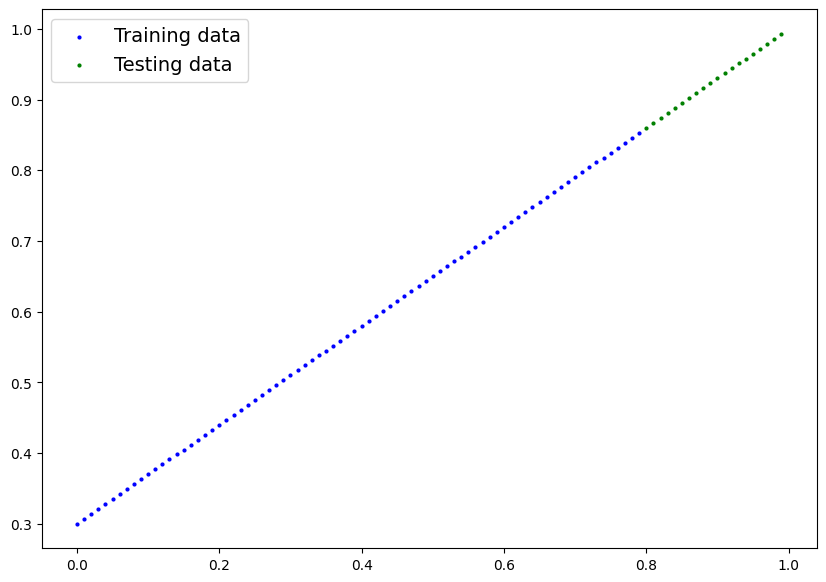

In [36]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

Önceki regresyon modellerini eğitmek için kurduğumuz data setini burada da oluşturduk. Şimdi ise burada classifaction için kurmuş olduğumuz model_1'in içeriğini aynı olacak şekilde alıp bir regresyon modeli oluşturup bu veri seti üzerinde eğitmeyi deneyelim.

In [37]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(
    params = model_2.parameters(),
    lr = 0.1
)

Kayıp Fonksiyonu (Loss Function): Sınıflandırma için kullandığımız BCEWithLogitsLoss bir kenara bırakılıyor ve yerine regresyon problemlerinin klasiği olan nn.L1Loss() (Mean Absolute Error - Ortalama Mutlak Hata) tanımlanıyor.

Optimize Edici (Optimizer): SGD aynı kalıyor, ancak içine yeni eğiteceğimiz modelin parametreleri (model_2.parameters()) veriliyor.

Şimdi de train ve test loopunu tekrardan yazalım.

In [39]:
torch.manual_seed(42)
epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  # Training mode
  model_2.train()

  #1. Forward Pass
  y_pred = model_2(X_train_regression)

  #2.Calculte Loss
  loss = loss_fn(y_pred, y_train_regression)

  #3. Optimizer Grad Zero
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer Step
  optimizer.step()


  # Testing mode
  model_2.eval()
  with torch.inference_mode():
    #1. Forward pass
    y_pred_test = model_2(X_test_regression)
    #2. Calculate Loss
    loss_test = loss_fn(y_pred_test, y_test_regression)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {loss_test:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


Teşhis Doğrulandı: Kurduğumuz sadece düz (doğrusal) katmanlardan oluşan o mimari bozuk değilmiş! Sadece "düz çizgileri" öğrenmek için tasarlanmış bir mimariymiş. Yuvarlak veriyi bu yüzden öğrenememiş.

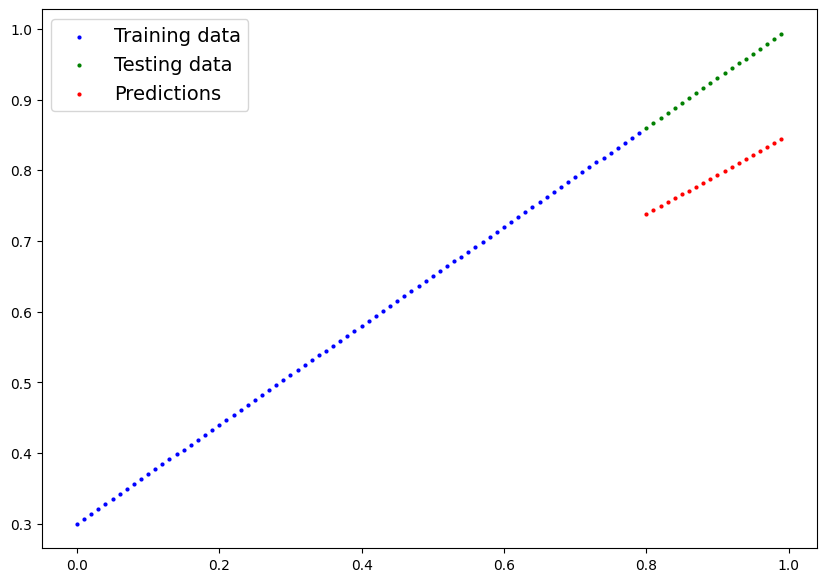

In [40]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Biz modelimizi ve verilerimizi hızlı çalışsın diye ekran kartına (GPU / device) gönderdik.

Ancak grafikleri çizmek için kullanacağımız Python kütüphanesi olan Matplotlib, ekran kartındaki (GPU) verileri okuyamaz; sadece işlemcideki (CPU) verilerle çalışabilir.

Bu yüzden bir sonraki adımda grafik çizdirmeden önce, verilerimizi .cpu() komutuyla tekrar işlemciye çekmemiz gerekecek.

# Non-Linearity

Modelimizin doğrusal katmanları sayesinde düz çizgiler çizebildiğini gördük.".

Ardından asıl o can alıcı soruyu soruyor: "Peki ona düz olmayan (doğrusal olmayan / kavisli) çizgiler çizme kapasitesini nasıl vereceğiz?". Öncelikle veriyi sıfırdan tekrar yaratarak başlıyoruz.

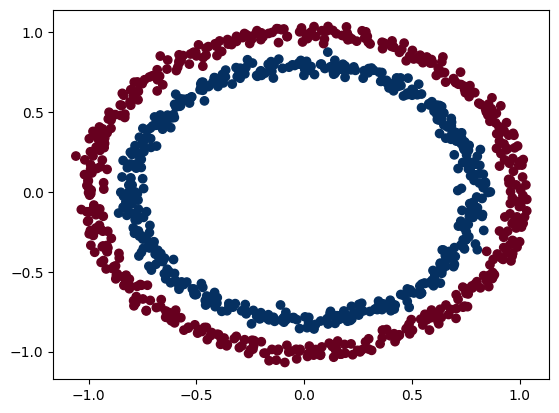

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(
    n_samples = n_samples,
    noise = 0.03,
    random_state = 42
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

`make_circles: `Python'un Scikit-Learn kütüphanesinden, bizim için iç içe geçmiş iki halka üretecek olan hazır fonksiyonu çağırıyoruz.

`n_samples = 1000: `Tıpkı en başta yaptığımız gibi, test ve eğitim için toplam 1000 adet nokta üretiyoruz.

`noise=0.03: `Burası güzel bir detay. Halkalar pergelle çizilmiş gibi kusursuz olmasın, gerçek hayattaki veriler gibi biraz dağınık ve gerçekçi olsun diye hafif bir "gürültü/sapma" (noise) ekliyoruz.

In [42]:
from sklearn.model_selection import train_test_split

# Öncelikle datayı tensörlere çevirmemiz gerekiyor
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

Şimdi her şey hazır. Artık lineer olmayan modelimizin iskeletini kurabiliriz.

PyTorch'un içinde bir sürü farklı doğrusal olmayan fonksiyon var ama yazarın da belirttiği gibi, derin öğrenme dünyasının en popüler ve genellikle en iyi performans gösteren yıldızı ReLU'dur (Rectified Linear Unit).

Modelden çıkan eksi (-) değerleri sıfıra eşitler, artı (+) değerlere ise dokunmaz. Bu kadar basit bir bükme işlemi bile üst üste bindiğinde o muazzam kavisleri yaratmaya yeter.

In [44]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x:torch.Tensor):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [45]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [46]:
# https://playground.tensorflow.org/

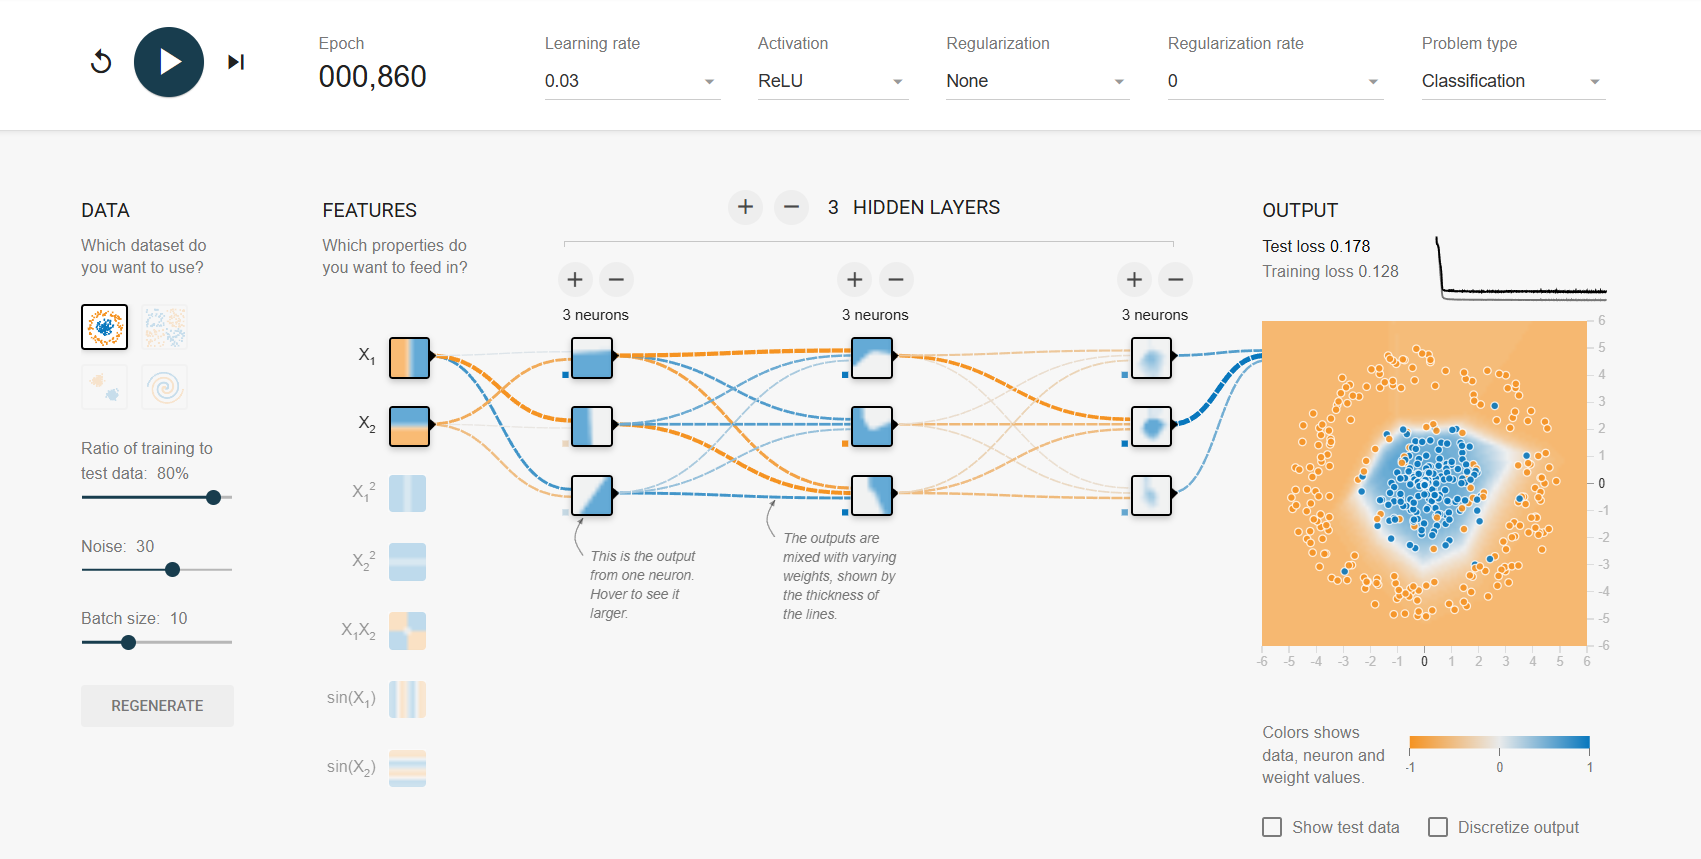

Dikkat edersen, üst tarafta yeşil bir kutu içine alınmış "Activation: ReLU" seçeneği var.

En sağdaki "OUTPUT" (Çıktı) grafiğine baktığımızda ise o beklediğimiz mucizeyi görüyoruz: Arka plandaki renkler (karar sınırları) artık cetvelle çizilmiş gibi dümdüz değil. Mavi ve turuncu noktaları birbirinden ayırmak için mükemmel kavisler, yuvarlaklar (non-linear çizgiler) oluşturulmuş. * İşte ReLU fonksiyonunun o basit "eksileri sıfır yap, artılara dokunma" mantığı, katmanlar arasında üst üste bindiğinde modelin böyle karmaşık ve kıvrımlı şekilleri öğrenebilmesini sağlar.

In [47]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params = model_3.parameters(),
    lr = 0.1
)

In [48]:
torch.manual_seed(42)
epochs = 1500

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # Training Mode
  model_3.train()

  #1. Forward Pass (logits -> prediction probablities -> prediction labels)
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calculate Loss/Accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #3. Optimizer Grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer Step
  optimizer.step()

  ### Test Mode
  model_3.eval()
  with torch.inference_mode():
    #1. Forward Pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate Loss/Accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 1100 | Loss: 0.

Epoch 0: Başarı oranı (Accuracy) tam %50.00. Model tamamen cahil, sadece yazı-tura atıyor.

Epoch 100 ile 500 arası: Başarı oranı yavaş yavaş, adeta gıdım gıdım artıyor (%52'lerden %56'lara çıkıyor). Bunun sebebi, modelin elindeki "düz çizgileri" ReLU sayesinde bükmeye ve kavisli hale getirmeye çalışarak doğru şekli bulmak için çabalamasıdır.

Epoch 600 ve sonrası (Kırılma Noktası): İşte sihir burada gerçekleşiyor! Epoch 600'de başarı %54.50 iken, Epoch 800'e geldiğimizde eğitim başarısı %64.00, test başarısı ise %67.50'ye fırlıyor! Aynı zamanda kayıp (Loss) değeri de 0.69 seviyelerinden 0.64 seviyelerine doğru hızla düşmeye başlıyor.

In [49]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

In [50]:
y_preds[:10], y_preds[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

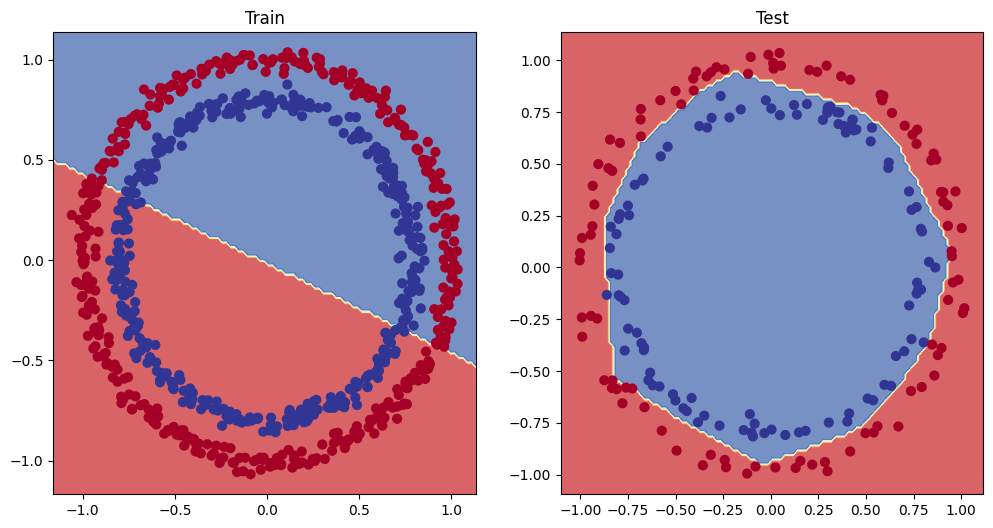

In [51]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

`Sol Grafik (Train - model_1):` Bu bizim eski modelimiz. Sadece doğrusal (nn.Linear) katmanları olduğu için dünyayı sadece düz çizgilerden ibaret sanıyor. Gördüğün gibi kırmızı ve mavi halkaların tam ortasından dümdüz, çapraz bir çizgi (cetvel) çekmiş ve veriyi ayırmakta tamamen çuvallamış.

`Sağ Grafik (Test - model_3):` Bu bizim yeni modelimiz! Araya eklediğimiz o basit ReLU fonksiyonları sayesinde modelimiz o düz çizgiyi bükmeyi öğrenmiş. İçteki mavi halkayı bir çember gibi sararak dıştaki kırmızı halkadan kavisli bir şekilde (non-linear) ayırmayı başarmış.

# ReLU nasıl çalışıyor?

Tamam, ReLU'yu kullandık ve işe yaradı ama bu fonksiyonlar gerçekte veriye ne yapıyor da o düz çizgiler bükülüyor?

- Şu ana kadar 2 boyutlu grafiklerdeki basit noktalarla uğraştık.
- Ancak gerçek hayatta bitkilerin fotoğraflarını sınıflandırmak veya Wikipedia'daki metinleri özetlemek istediğinizde, veriler inanılmaz derecede karmaşık ve kavisli (non-linear) olacaktır. Bu yüzden bu fonksiyonların mantığını anlamak hayati önem taşır.

In [52]:
A = torch.arange(
    start = -10,
    end = 10,
    step = 1,
    dtype = torch.float32
)

A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

Bu kod, -10'dan başlayıp +9'a kadar birer birer artan dümdüz bir sayı dizisi oluşturur (Çıktıda -10., -9., -8... şeklinde görebilirsin).

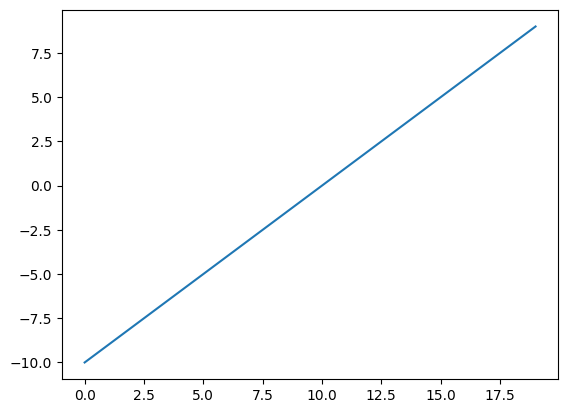

In [53]:
plt.plot(A)

Şimdi relu'nun nasıl çalıştığını görmek için kendi elimizle kendi relumuzu yazalım.

In [54]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

Bu satır modele şunu söyler: "Sana gelen sayı (x) ile 0'ı karşılaştır. Hangisi büyükse onu al."

Eğer sayı eksiyse (örn: -5), 0 daha büyük olduğu için sonuç 0 olur. Eğer sayı artıysa (örn: 7), 7 daha büyük olduğu için sonuç 7 olur. Yani eksileri sıfırlar, artılara dokunmaz.

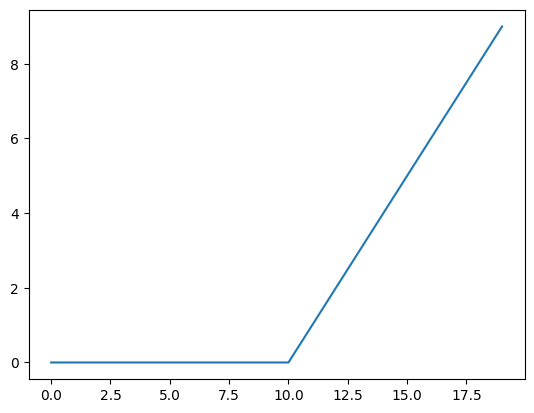

In [55]:
plt.plot(relu(A))

Eskiden sol alt köşeye kadar dümdüz inen o çizgi, artık 0 noktasında sert bir şekilde kırılmış (bükülmüş).

Grafiğin sol yarısı (eksi değerler) tamamen yere yapışık, düz bir çizgi halinde (y=0). Sağ yarısı (artı değerler) ise eski çapraz yolculuğuna devam ediyor.

İşte derin öğrenmedeki o "Doğrusalsızlık" (Non-linearity) mucizesi bu basit "kırılma/bükülme" noktasından doğar. Bu fonksiyonlardan binlercesini üst üste eklediğinizde, o iç içe geçmiş yuvarlakları saracak mükemmel kavisleri yaratabilirsiniz.

`Sigmoid Fonksiyonu`
$$S(x) = \frac{1}{1+e^{-x\_i}}$$
Bunu koda dökelim.

In [56]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

Çıkan sonuçlar tam bir görsel şölen ve daha önce konuştuğumuz kuralın matematiksel ispatıdır. Hatırlarsan Sigmoid için "ne verirsen ver, 0 ile 1 arasına sıkıştırır" demiştik:

- En küçük eksi sayılar (-10): Çıktının başındaki 4.5398e-05 değerine dönüşmüş. Bu sayı $0.000045$ demektir, yani pratik olarak 0'a çok yakındır.
- Tam ortadaki sayı (0): Listenin tam ortasındaki değerin 5.0000e-01 olduğunu görebilirsin. Bu da tam olarak 0.5 demektir.
- En büyük artı sayılar (9): Çıktının sonundaki 9.9988e-01 değerine dönüşmüş. Bu da $0.9998$ demektir, yani pratik olarak 1'e çok yakındır.

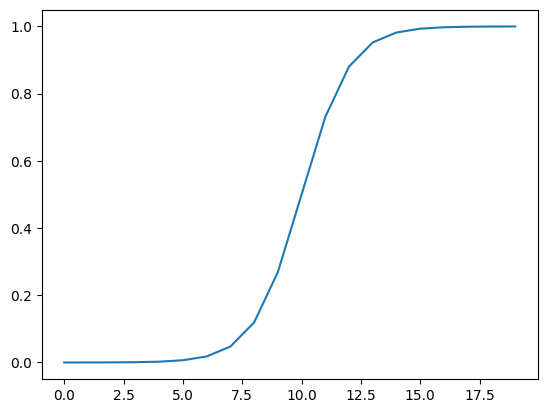

In [57]:
plt.plot(sigmoid(A))

Grafiğin Y eksenine (dikey eksen) dikkatlice bak. Alt sınır tam 0.0, üst sınır tam 1.0. Ortadaki sıfır noktası ise tam 0.5'ten geçiyor. İşte bu yüzden Sigmoid, makinenin "ham çıktılarını" alıp bizim anlayabileceğimiz %0 ile %100 arasında net olasılıklara çeviren mükemmel bir araçtır.

---
Derin Öğrenmenin Büyük Sırrı

- Soru: "Sınırsız sayıda doğrusal (düz) ve doğrusal olmayan (düz olmayan) çizgiler kullanarak hangi desenleri çizebilirsiniz?"

- Cevap: "Neredeyse her şeyi, değil mi?"

- Mantık: Bizim yapay zeka modelimizin yaptığı şey tam olarak budur. Biz modele "Şuraya bir kavis çiz, burayı yuvarlak yap" diye emirler vermiyoruz. Biz ona sadece araçlar veriyoruz.

- Araçlar Neler?: Düz çizgiler çizebilen doğrusal katmanlar (nn.Linear) ve o çizgileri bükebilen doğrusal olmayan aktivasyon fonksiyonları (ReLU, Sigmoid vs.). Model bu basit araçları binlerce kez birleştirip üst üste koyarak, verideki en karmaşık desenleri (ister iç içe geçmiş halkalar olsun, isterse bir kedi fotoğrafındaki kulak kıvrımları olsun) kendisi keşfediyor.

# Multi-Class PyTorch model

Çok sınıflı sınıflandırma, sınıflandırılacak şeylerin ikiden fazla seçenekten (sınıftan) oluştuğu problemlerdir. Örneğin bir fotoğraftaki canlının "Kedi mi, Köpek mi, yoksa Tavuk mu?" olduğunu bulmaya çalışmak çok sınıflı bir problemdir.

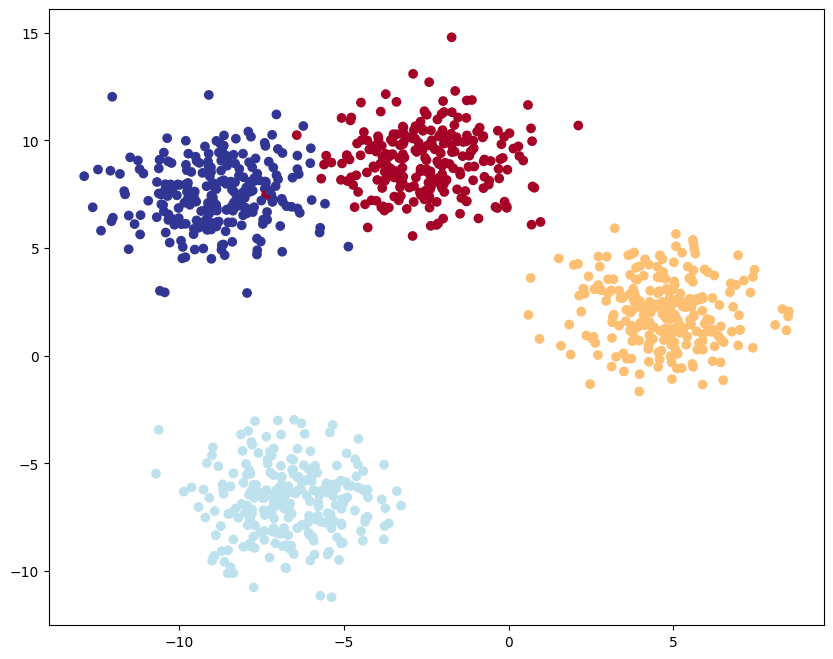

In [58]:
# Öncelikle gerekli kütüphaneleri import ederek başlayalım
import torch
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Şimdi de bazı kuralları belirleyelim
NUM_FEATRUES = 2
NUM_CLASSES = 4
RANDOM_SEED = 42

# İlk olarak veri üretimi ile başlayalım
X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATRUES,   # x değerleri
    centers = NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED
)

# Şimdi bu verileri tensöre çevirelim
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Şimdi de train ve test verilerini ayıralım
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob,
    y_blob,
    test_size = 0.2,
    random_state = RANDOM_SEED
)

# Şimdi oluşturmuş olduğumuz verilere bakalım
plt.figure(figsize=(10,8))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


Ekranda dört farklı bölgeye toplanmış lacivert, bordo, açık mavi ve turuncu renkli "kümeler" (blobs) görüyoruz. "Bu veri seti doğrusalsızlık (non-linearity) gerektiriyor mu? Yoksa bu kümeleri ayırmak için ardışık düz çizgiler çizebilir misiniz?". Biraz üzerine düşünelim: Eski problemimizdeki "iç içe geçmiş yuvarlakları" düz bir çizgiyle ayırmak imkansızdı, bu yüzden ReLU ekleyip çizgiyi bükmüştük. Ancak bu yeni grafikteki 4 küme birbirinden tamamen ayrı yerlerde duruyor. Sence bu 4 renkli kümeyi birbirinden ayırmak için kavisli (non-linear) çizgilere gerçekten ihtiyacımız var mı, yoksa aralarına 3-4 tane cetvelle çizilmiş düz çizgi (linear) çeksek de işimizi görür mü?

In [59]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [60]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """
    input_features: Modele girecek veri sayısı (Bizim veri setimizde X ve Y
    koordinatları olmak üzere NUM_FEATURES=2).

    output_features: Modelden çıkmasını istediğimiz sınıf sayısı (Bizim 4
    farklı rengimiz/kümemiz olduğu için NUM_CLASSES=4).

    hidden_units: Modelin beynindeki gizli katmanların genişliği
    (Burada varsayılan olarak 8 seçilmiş).
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x:torch.Tensor):
    return self.linear_layer_stack(x)

In [61]:
model_4 = BlobModel(
    input_features=NUM_FEATRUES,
    output_features=NUM_CLASSES
).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

Burada sinir ağımızın altyapısını kurduk ve modelimizi oluşturduk. Şimdi loss fonksiyonu ve optimizer kısmına geçelim.

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_4.parameters(),
    lr = 0.1
)

İkili sınıflandırma (Kırmızı mı Mavi mi?) yaptığımız eski günlerde hata ölçümü için BCEWithLogitsLoss kullanıyorduk. Ancak görselin en başında belirtildiği gibi, problemimiz artık "Çok Sınıflı" (Multi-class) olduğu için o eski fonksiyonu bırakıyoruz.
- Yeni Kayıp Fonksiyonu: loss_fn = nn.CrossEntropyLoss(). Bu fonksiyon, PyTorch'ta 3 veya daha fazla seçeneğin olduğu durumlar için özel olarak tasarlanmış, çok sınıflı problemlerin altın standardıdır.
- Optimize Edici: Optimize edicimiz (SGD) ve öğrenme hızımız (lr=0.1) aynı kalıyor, sadece içine yeni eğiteceğimiz model_4.parameters() değerini veriyoruz.

Pekala, kayıp fonksiyonumuz ve optimize edicimiz hazır ve modelimizi eğitmeye hazırız, ancak bunu yapmadan önce modelimizin çalışıp çalışmadığını görmek için veriler üzerinde tek bir ileri geçiş (forward pass) yapalım.

In [63]:
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)

Bunlar, modelin henüz eğitilmemiş beyninden çıkan ham skorlardır (Logits).

Neden 4 tane geldi? Çünkü modelimize NUM_CLASSES = 4 demiştik. Model o ilk satırdaki sayılarla aslında bize şunu söylüyor: "Bana verdiğin bu 1. noktanın 0. renge ait olma skoru -1.27, 1. renge ait olma skoru -0.64, 2. renge ait olma skoru -1.47, 3. renge ait olma skoru -0.70'dir."

In [64]:
model_4(X_blob_train.to(device))[0].shape

torch.Size([4])

Harika, modelimiz sahip olduğumuz her bir sınıf için bir değer tahmin ediyor.

Şimdi o eksili artılı karmaşık sayıları bizim anlayabileceğimiz "Yüzdelik İhtimallere" (%0 - %100) çeviren yeni süper kahramanımızla tanışıyoruz: Softmax Aktivasyon Fonksiyonu.
* Eski dostumuz Sigmoid her bir seçeneği kendi içinde değerlendirirdi.
* Ancak Softmax, her bir tahmin sınıfının olasılığını diğer tüm olası sınıflara kıyasla hesaplar. Yani model bir veriye bakarken "Bu %80 ihtimalle 1. sınıftır, geri kalan %20 ihtimali de diğer 3 sınıfa paylaştırıyorum" şeklinde bütüncül bir mantık yürütür.

In [65]:
y_logits = model_4(X_blob_train.to(device))
y_pred_probs = torch.softmax(y_logits, dim = 1)

In [66]:
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        [0.3405, 0.0657, 0.4446, 0.1492],
        [0.2527, 0.0424, 0.2283, 0.4766]], device='cuda:0',
       grad_fn=<SliceBackward0>)


Softmax'tan geçtikten sonra, her bir örneğin (satırın) kendi içindeki ihtimallerinin toplamı tam 1'e (veya ona çok yakın bir sayıya) eşit olur.

In [67]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

Cevap kusursuz bir şekilde tensor(1.) çıkıyor. Yani Softmax, ihtimalleri kusursuz bir "pasta dilimi" gibi dağıtıyor ve toplamı daima %100 yapıyor.

In [68]:
y_pred_probs[0]

tensor([0.1838, 0.3422, 0.1500, 0.3239], device='cuda:0',
       grad_fn=<SelectBackward0>)

Burada en yüksek ihtimalli olan 1.indexteki 0.3422. Bunu da aşağıdaki gibi .argmax() fonksiyonunu kullanarak döndürebiliriz.

In [69]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

Çok sınıflı bir problemde verinin modelden çıkıp son karara dönüşene kadar izlediği yol şöyledir:

1- Modelin ilk ürettiği ham ve anlamsız çıktılara logits denir.

2- Çok sınıflı bir sınıflandırma probleminde, bu logitleri tahmin olasılıklarına (prediction probabilities) dönüştürmek için Softmax aktivasyon fonksiyonu (torch.softmax) kullanılır.

3- Son olarak, en yüksek tahmin olasılığına sahip değerin indeksini bulup (en muhtemel sınıf numarasını seçmek için) torch.argmax() kullanılır.

In [70]:
torch.manual_seed(42)
epochs = 100

X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.type(torch.LongTensor), y_blob_test.type(torch.LongTensor)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  # Training
  model_4.train()
  #1. Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  #2. Calculate Loss/Accuracy
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(
      y_true = y_blob_train,
      y_pred = y_pred
  )

  #3. Optimizer Zero Grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer Step
  optimizer.step()


  ### Testing
  model_4.eval()
  with torch.inference_mode():
    #1. Forward Pass
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    #2. Calculate Loss/Accuracy
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(
        y_true = y_blob_test,
        y_pred = test_pred
    )

  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


Modelimizi eğittik, şimdi onu daha önce hiç görmediği test verileriyle (X_blob_test) sınava sokuyoruz.

In [71]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

Eğer amacınız sadece modelin hangi sınıfı seçtiğini bulmaksa ve yüzdelik ihtimalleri (Örn: %85 eminim) görmek umrunuzda değilse, torch.softmax() adımını tamamen atlayabilirsiniz!. Doğrudan ham skorlar üzerine torch.argmax(y_logits, dim=1) uygulayarak direkt nihai karara ulaşabilirsiniz.

Çünkü argmax sadece dizideki en büyük sayının yerini bulur. İster ham skorlara (logits) bakın, ister Softmax yüzdelerine bakın; en büyük sayı her zaman aynı indekstedir. Bu kısayol, bilgisayarınızı (özellikle büyük projelerde) fazladan bir hesaplama adımından (Softmax hesaplamaktan) kurtarır.

In [72]:
y_pred_probs = torch.softmax(y_logits, dim=1)

y_preds = y_pred_probs.argmax(dim = 1)

print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


Gördüğün gibi modelin ilk 10 tahmininin tamamı gerçek cevaplarla birebir, kusursuz bir şekilde eşleşiyor. Zaten hemen altındaki %99.5'lik "Test accuracy" (Test başarısı) skoru da bu muazzam isabet oranını kanıtlıyor.

Verilerimiz GPU (ekran kartı) üzerinde olduğu için, matplotlib ile kullanabilmek adına onları CPU'ya (işlemciye) taşımamız gerekecek. Çünkü hesaplamaları ışık hızında yapan PyTorch tensörleri ekran kartında yaşarken, grafikleri çizen Matplotlib kütüphanesi sadece işlemci üzerinde çalışabilir. Neyse ki bizim kullandığımız plot_decision_boundary() fonksiyonu arka planda bu hamallığı bizim yerimize otomatik olarak hallediyor.

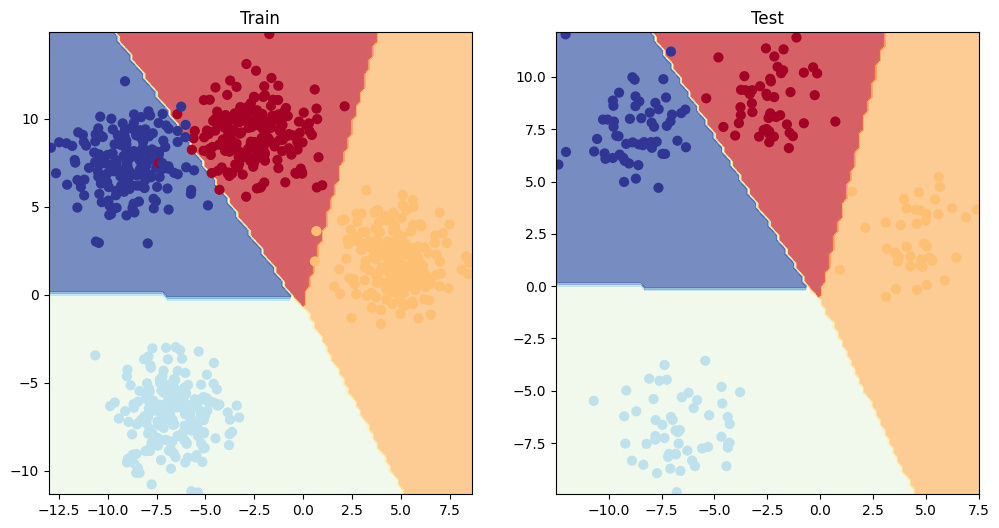

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

Hatırlarsan modeli kurarken "Acaba bu 4 kümeyi ayırmak için ReLU (doğrusal olmayan / kavisli) fonksiyonlara ihtiyacımız var mı?" diye sormuş ve modelimize o kavis yeteneğini eklememiştik. Bu grafikler haklı olduğumuzu yüzde yüz kanıtlıyor! Renk kümeleri birbirinden zaten ayrı yerlerde (uzak) durduğu için, modelimiz aralarına sadece düz çizgiler çekerek bu 4 sınıfı %99.5 başarıyla birbirinden ayırmayı başardı.

# Sınıflandırma Metrikleri Nelerdir?

`Accuracy (Doğruluk): `Bizim eski dostumuz. Modelin 100 tahminden kaçını doğru bildiğini gösterir (Örn: %95 accuracy, 95 doğru demek).

`Precision (Kesinlik): `Modelin "1" (veya "Kırmızı") dediği şeylerin gerçekten ne kadarının "1" olduğunu ölçer. Yüksek Precision, daha az "Yanlış Pozitif" (False Positive) demektir. Yani model, "0" olan bir şeye yanlışlıkla "1" dememeye odaklanır.

`Recall (Duyarlılık / Geri Çağırma): `Gerçek hayatta "1" olan şeylerin, model tarafından ne kadarının yakalanabildiğini ölçer. Yüksek Recall, daha az "Yanlış Negatif" (False Negative) demektir. Yani modelin asıl bulması gereken şeyleri kaçırmamaya (Örn: kanserli bir hücreye yanlışlıkla "sağlıklı" dememeye) odaklanır.

`F1-Score: `Precision ve Recall değerlerinin mükemmel bir harmanıdır (harmonik ortalamasıdır). Bir modelin genel sağlığını görmek için harikadır; 1 en iyi skor, 0 ise en kötü skordur.

`Confusion Matrix (Karmaşıklık Matrisi): `Tahmin edilen değerlerle gerçek değerleri yan yana bir tablo (matris) olarak karşılaştırır. Eğer model %100 kusursuz tahmin yapıyorsa, bu tablodaki sayılar sadece sol üst köşeden sağ alt köşeye doğru inen çapraz bir çizgi (diagonal line) üzerinde yer alır. * Classification Report (Sınıflandırma Raporu): Yukarıda saydığımız Precision, Recall ve F1-Score gibi ana metriklerin hepsini tek bir yerde toplayan harika bir özet koleksiyondur.

Scikit-Learn: Dünya çapında en popüler makine öğrenmesi kütüphanelerinden biridir ve sklearn.metrics modülüyle bu hesaplamaların hepsini tek satırda yapabilir.

TorchMetrics: Eğer her şeyin PyTorch tensörleriyle ve ekran kartında (GPU) pürüzsüzce çalışmasını istiyorsanız, PyTorch'un kendi ekosistemindeki torchmetrics kütüphanesini kullanabilirsiniz.

In [74]:
from sklearn.metrics import confusion_matrix

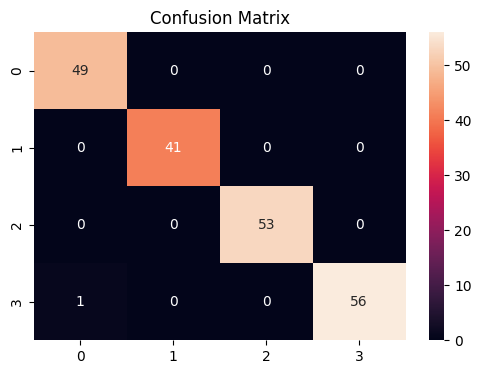

In [77]:
c_matrix = confusion_matrix(
    y_blob_test.to("cpu"),
    y_preds.to("cpu")
    )
import seaborn as sns
plt.figure(figsize=(6,4))
plt.title("Confusion Matrix")
sns.heatmap(
    c_matrix,
    annot = True
)
plt.show()

Yukarıda sklearn.metrics'den gelen confusion matrix'i çizdik. Şimdi de Torchmetrics'den geleni çizelim.

In [78]:
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics==0.9.3
  from torchmetrics import Accuracy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 12.4 MB/s eta 0:00:00


Eğer bilgisayarınızda veya Google Colab ortamınızda bu kütüphane yüklü değilse, kodun hata verip çökmesine izin vermez. Hemen except: kısmına geçer ve !pip install torchmetrics==0.9.3 komutuyla kütüphanenin doğru versiyonunu anında indirip kurar. Bu, kodunuzu başka biri çalıştırdığında "kütüphane bulunamadı" hatası almasını önleyen harika bir profesyonel dokunuştur.

In [79]:
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')